**Your task is to develop an ML model for car selling price prediction and analysis. The deployed system will provide users with
an approximate selling price for their cars based on several features,including fuel type, years of service, showroom price, number of
previous owners, kilometers driven, whether the seller is a dealer or an individual, and transmission type (manual/automatic).**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [7]:
data = pd.read_csv('car.csv')
print(data.head())
print(data.describe())
print(data.isnull().sum())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.32000

In [8]:
data['Car_Age'] = 2024 - data['Year']
data = data.drop(['Year', 'Car_Name'], axis=1)
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
numerical_cols = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])
model = RandomForestRegressor(n_estimators=100, random_state=0)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), 
                           ('model', model)])


In [9]:
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Present_Price',
                                                   'Kms_Driven', 'Owner',
                                                   'Car_Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission'])])),
                ('model', RandomForestRegressor(random_state=0))])

In [11]:
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

Mean Absolute Error: 0.61
Mean Squared Error: 1.07
Root Mean Squared Error: 1.03


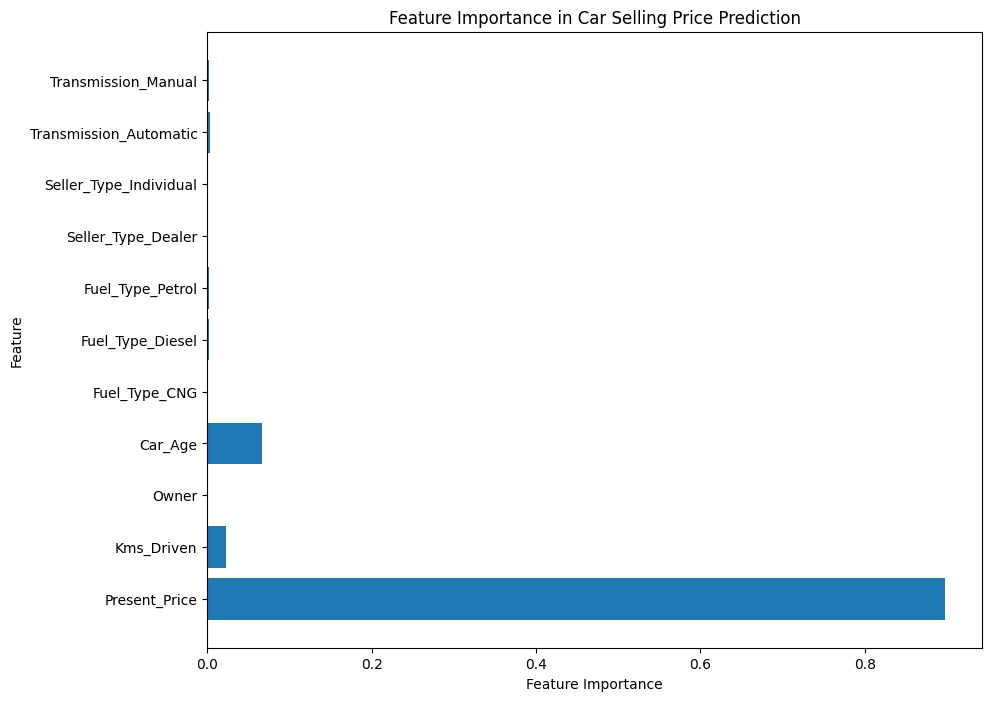

In [12]:
importances = model.feature_importances_
features = numerical_cols + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Car Selling Price Prediction')
plt.show()


In [13]:
import joblib
joblib.dump(pipeline, 'car_price_prediction_model.pkl')


['car_price_prediction_model.pkl']